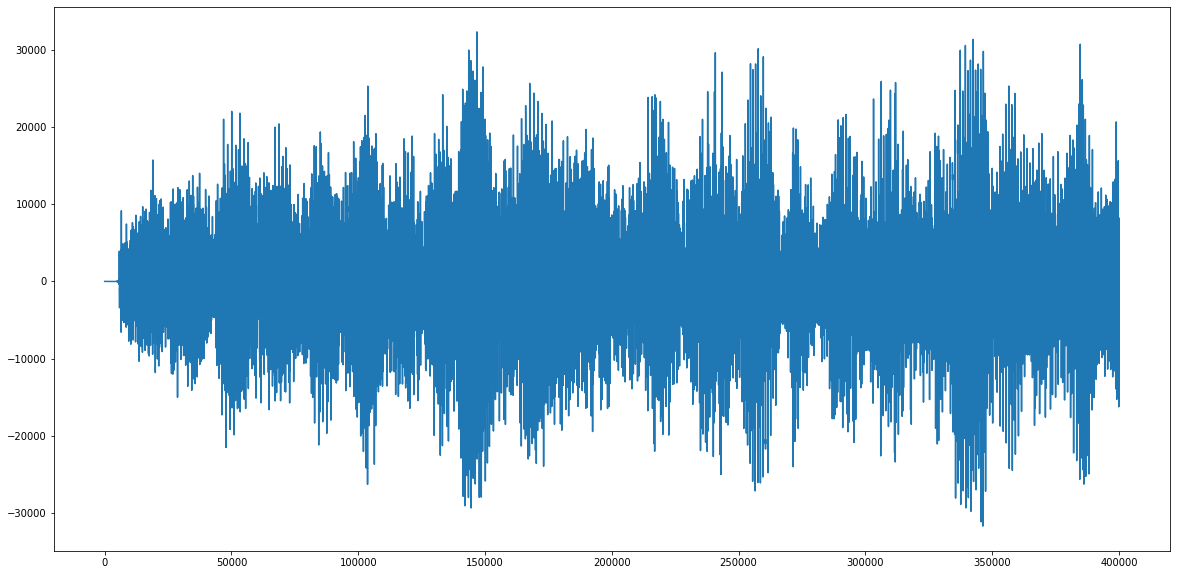

In [8]:
import dct_masking
import utils
import wav

from scipy.fftpack import dct, idct
import numpy as np

from matplotlib import pyplot as plt

amps = wav.read_orig()

plt.figure(1, figsize=(20, 10))
plt.plot(amps[0:400096])
plt.show()

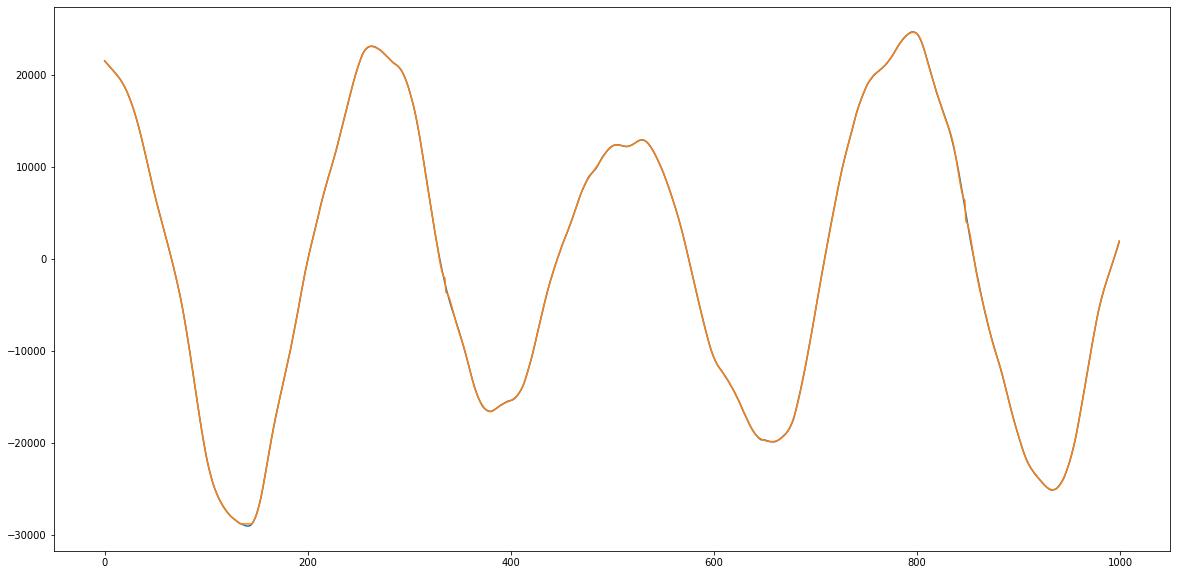

In [22]:
batch_size = 512

new_amps = np.zeros(amps.shape)
for batch_i in range(amps.shape[0] // batch_size):
    st, end = batch_i * batch_size, (batch_i + 1) * batch_size
    batch = amps[st:end]
    spec = dct(batch, norm='ortho')

    new_spec = np.array(spec)
    new_spec[64:] = 0
    new_amps[st:end] = idct(new_spec, norm='ortho')

# new_amps = np.rint(new_amps)
new_amps = utils.cut_peaks(new_amps, (0.05, 99.95))
wav.save_result('remove_hf', new_amps)

plt.figure(1, figsize=(20, 10))
plt.plot(amps[142000:143000])
plt.plot(new_amps[142000:143000])
plt.show()

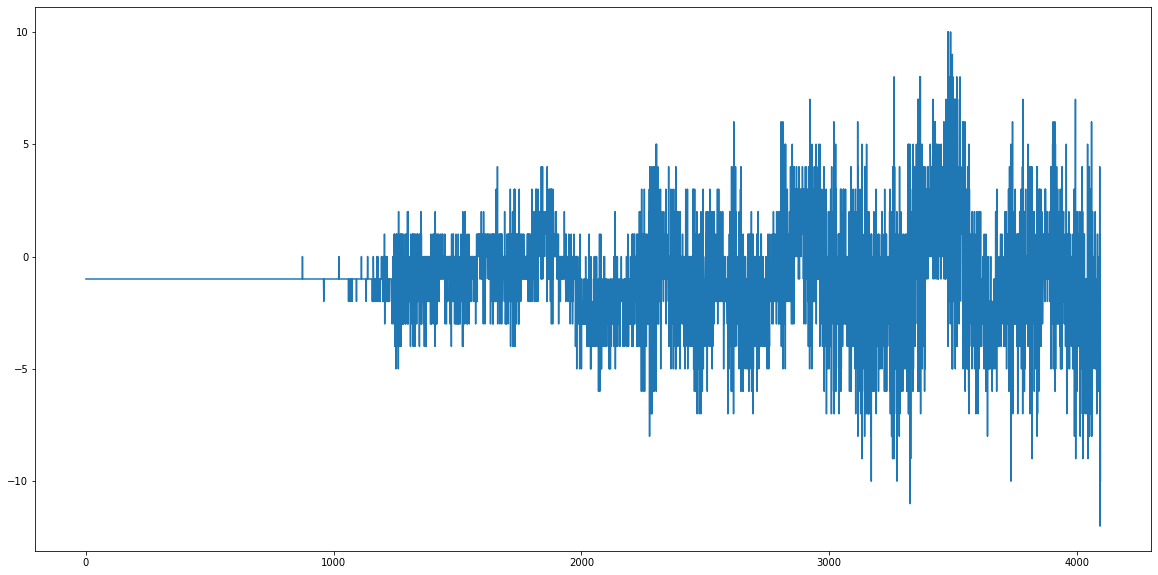

In [49]:
diff = new_amps - amps

plt.figure(1, figsize=(20, 10))
plt.plot(diff[0:4096])
plt.show()

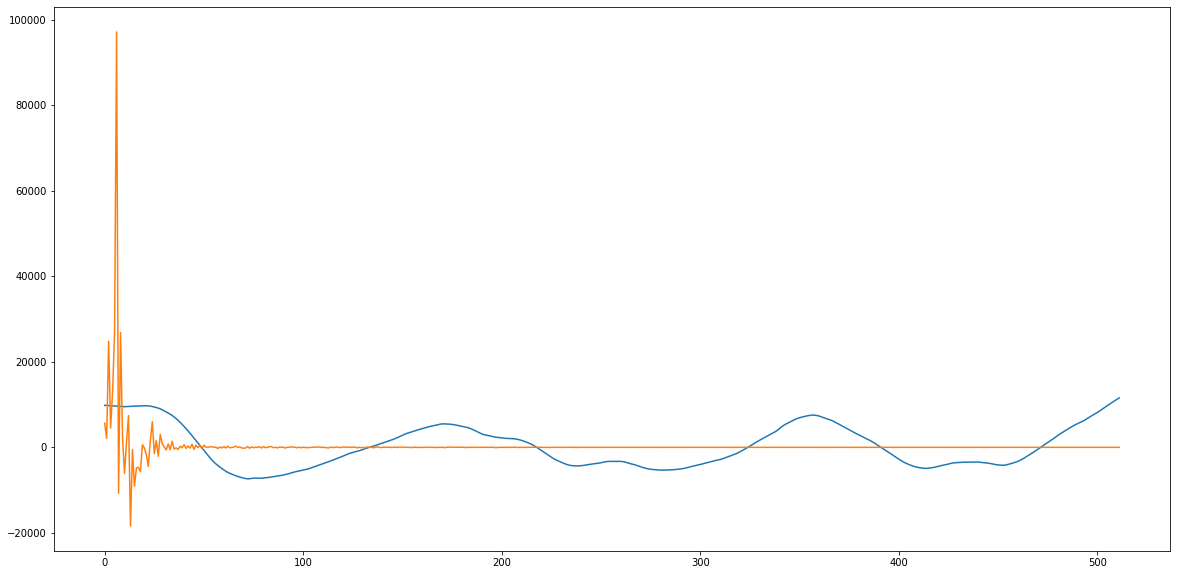

In [63]:
batch = amps[112000:112512]
spec = dct(batch, norm='ortho')

plt.figure(1, figsize=(20, 10))
plt.plot(batch)
plt.plot(spec)
plt.show()

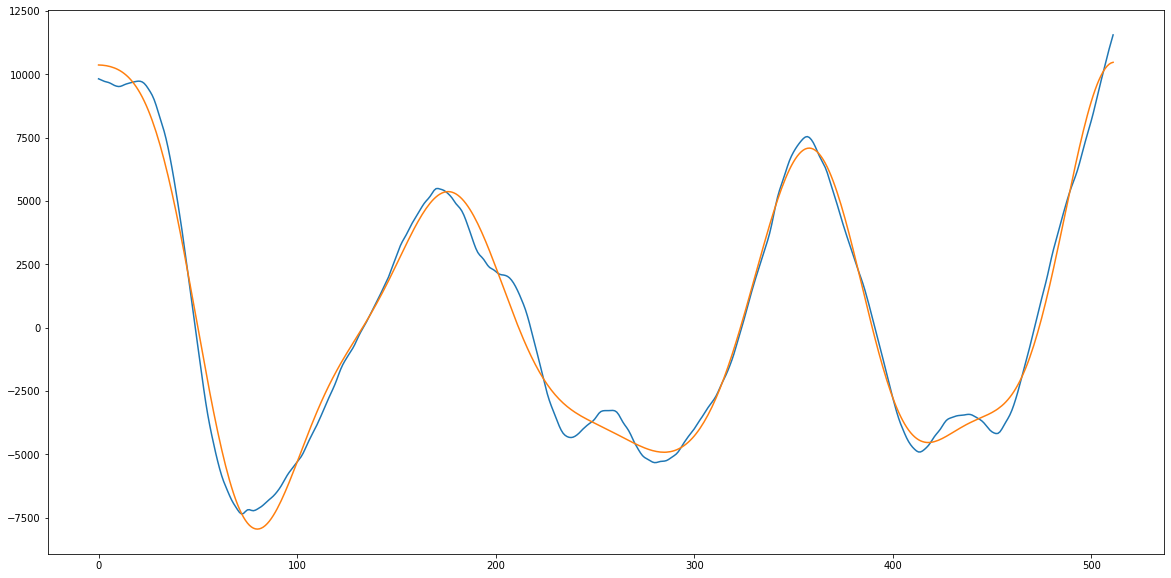

In [68]:
spec[16:] = 0

new_batch = np.rint(idct(spec, norm='ortho'))

plt.figure(1, figsize=(20, 10))
plt.plot(batch)
plt.plot(new_batch)
plt.show()